In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('space_decay.csv')
df.head()

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,...,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...


In [4]:
print('Shape:', df.shape)
print(df.info())
print(df.isnull().sum())

Shape: (14372, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER

In [5]:
drop_cols = ['COMMENT', 'FILE', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [6]:
for col in ['CREATION_DATE', 'EPOCH', 'LAUNCH_DATE', 'DECAY_DATE']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [7]:
# Fill numeric columns with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
if 'OBJECT_TYPE' in df.columns:
    df = pd.get_dummies(df, columns=['OBJECT_TYPE'])

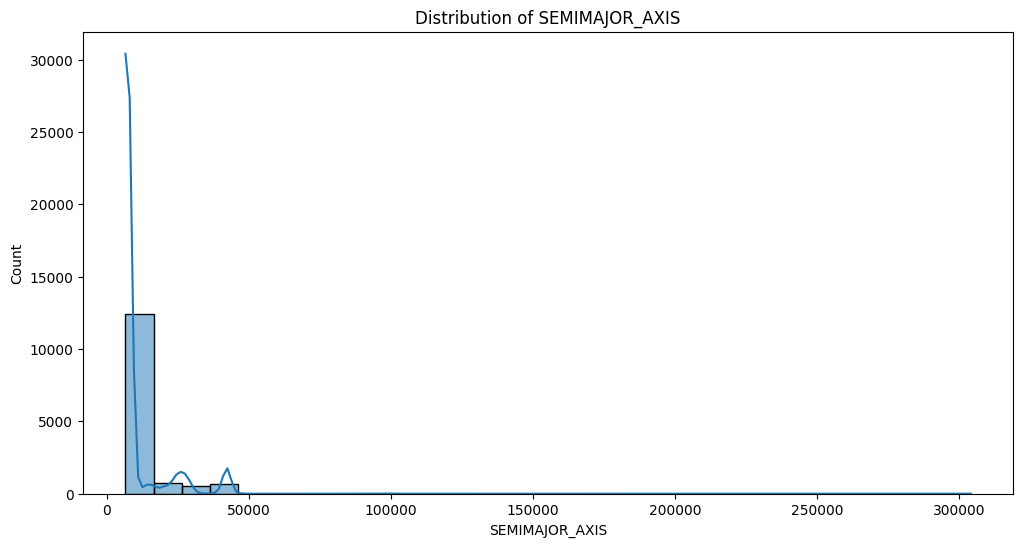

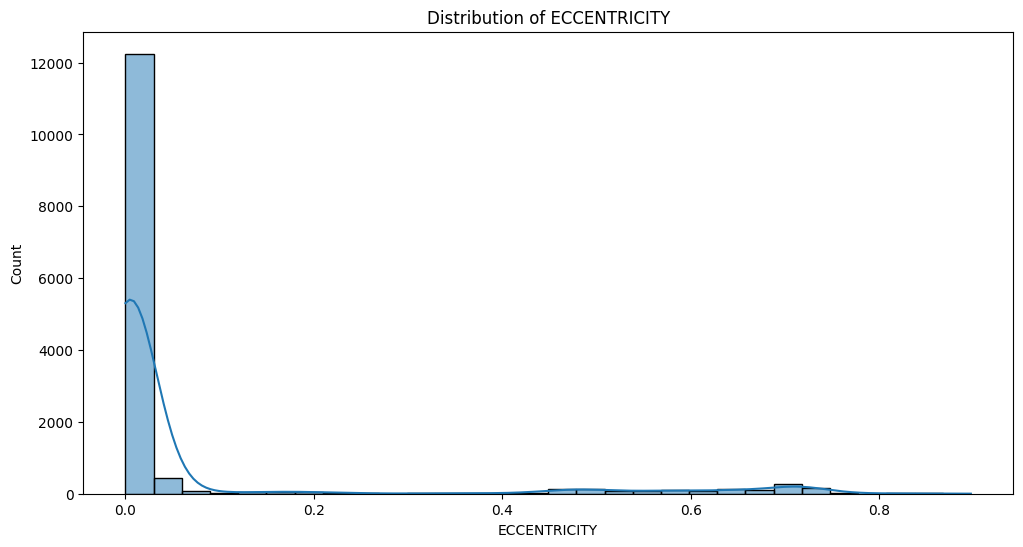

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(df['SEMIMAJOR_AXIS'], bins=30, kde=True)
plt.title('Distribution of SEMIMAJOR_AXIS')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['ECCENTRICITY'], bins=30, kde=True)
plt.title('Distribution of ECCENTRICITY')
plt.show()

In [10]:
df.to_csv('space_decay_preprocessed.csv', index=False)
print('Preprocessing complete. Cleaned data saved to space_decay_preprocessed.csv')

Preprocessing complete. Cleaned data saved to space_decay_preprocessed.csv


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('space_decay_preprocessed.csv')

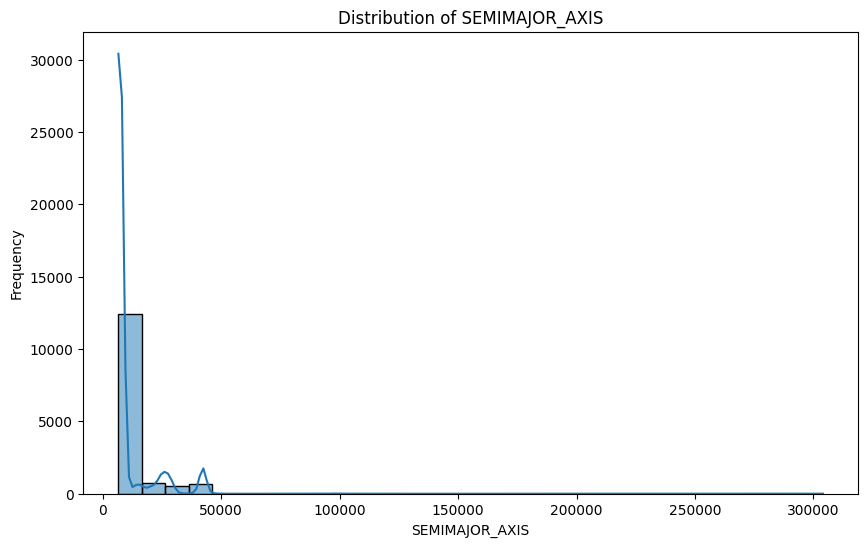

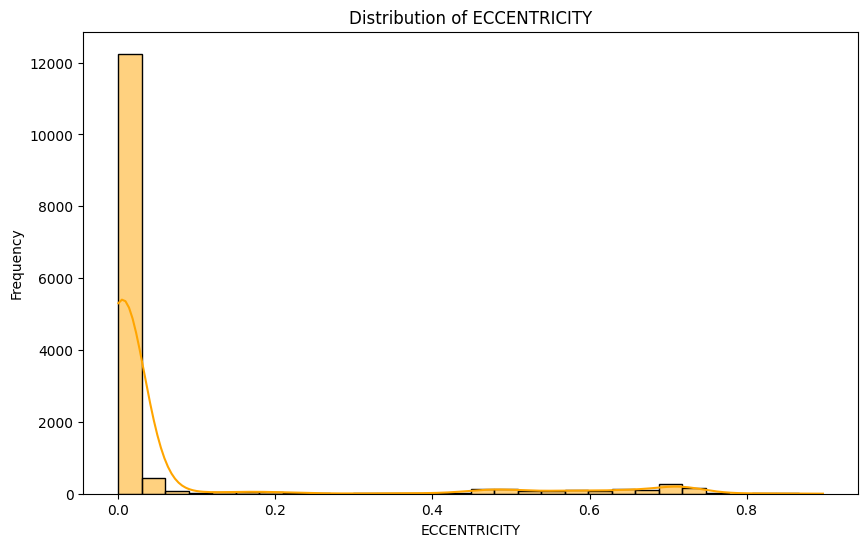

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['SEMIMAJOR_AXIS'], bins=30, kde=True)
plt.title('Distribution of SEMIMAJOR_AXIS')
plt.xlabel('SEMIMAJOR_AXIS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['ECCENTRICITY'], bins=30, kde=True, color='orange')
plt.title('Distribution of ECCENTRICITY')
plt.xlabel('ECCENTRICITY')
plt.ylabel('Frequency')
plt.show()

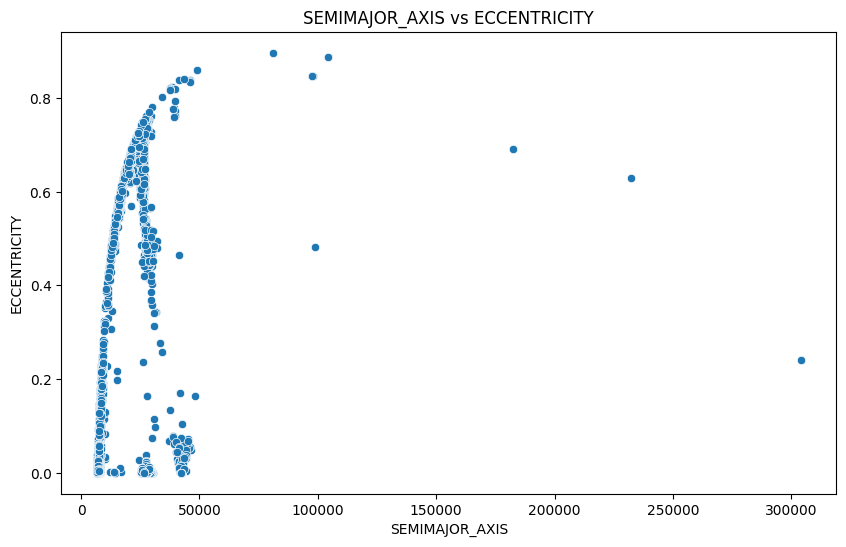

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SEMIMAJOR_AXIS', y='ECCENTRICITY', data=df)
plt.title('SEMIMAJOR_AXIS vs ECCENTRICITY')
plt.xlabel('SEMIMAJOR_AXIS')
plt.ylabel('ECCENTRICITY')
plt.show()

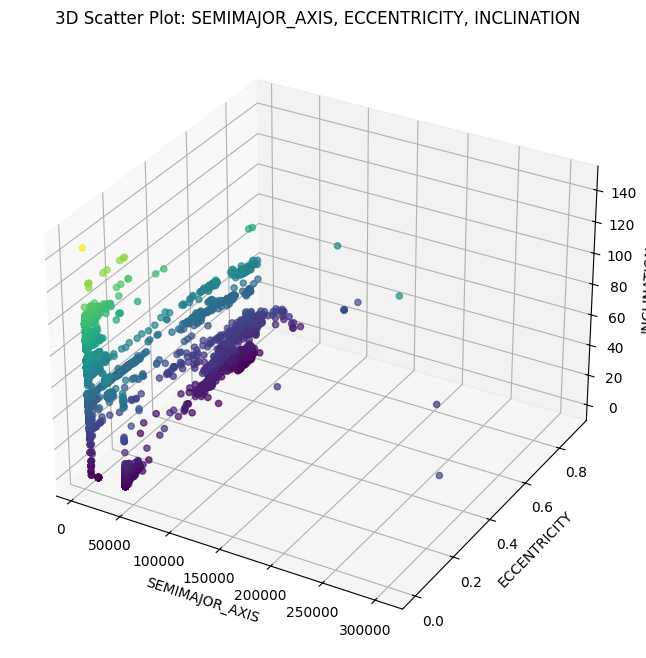

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['SEMIMAJOR_AXIS'], df['ECCENTRICITY'], df['INCLINATION'], c=df['INCLINATION'], cmap='viridis', alpha=0.7)
ax.set_xlabel('SEMIMAJOR_AXIS')
ax.set_ylabel('ECCENTRICITY')
ax.set_zlabel('INCLINATION')
ax.set_title('3D Scatter Plot: SEMIMAJOR_AXIS, ECCENTRICITY, INCLINATION')
plt.show()

In [15]:
fig = px.scatter_3d(
    df,
    x='SEMIMAJOR_AXIS',
    y='ECCENTRICITY',
    z='INCLINATION',
    color='INCLINATION',
    title='3D Scatter: SEMIMAJOR_AXIS vs ECCENTRICITY vs INCLINATION'
)
fig.show()

In [16]:
fig = px.scatter_3d(
    df,
    x='SEMIMAJOR_AXIS',
    y='ECCENTRICITY',
    z='INCLINATION',
    color='INCLINATION',
    title='3D Scatter: SEMIMAJOR_AXIS vs ECCENTRICITY vs INCLINATION'
)
fig.show()

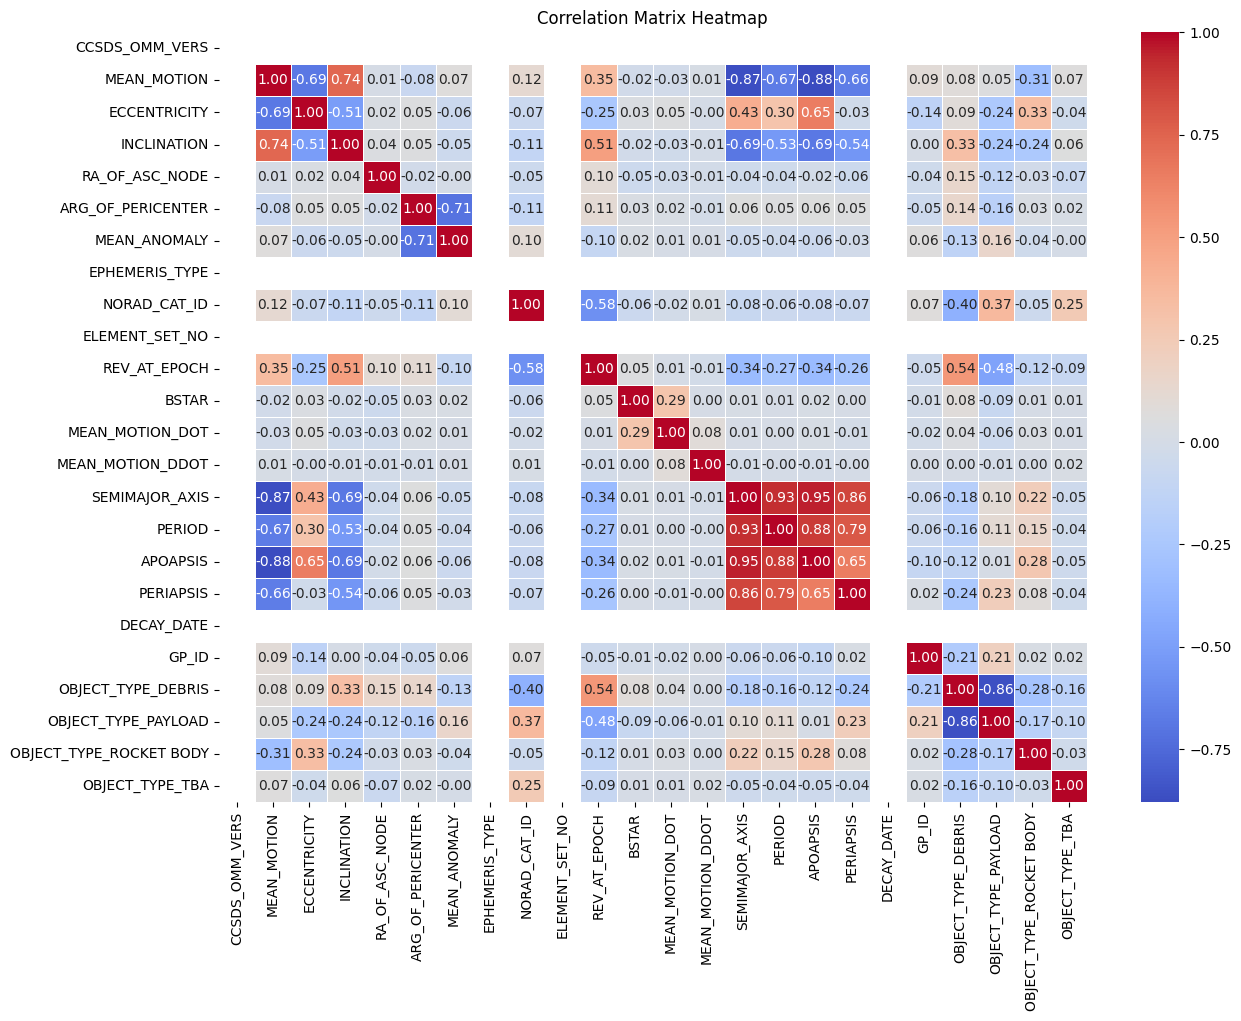

In [17]:
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\vishe\AppData\Local\Temp\ipykernel_25304\237346857.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




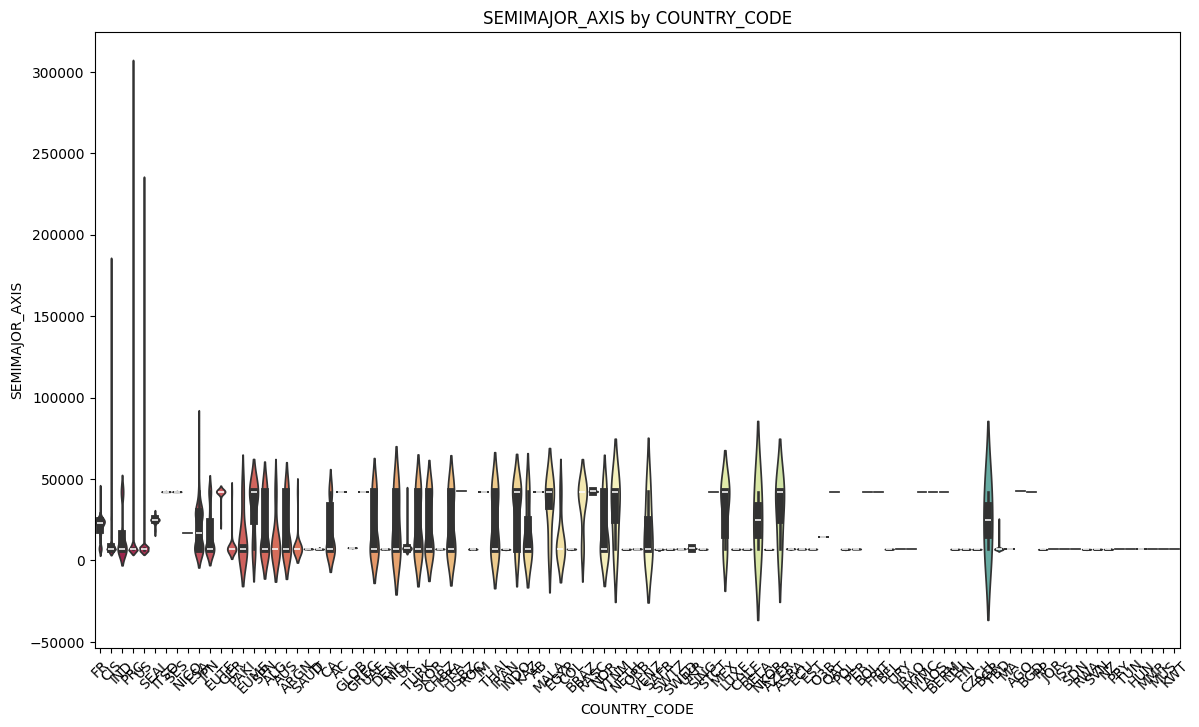

In [20]:
plt.figure(figsize=(14,8))
if 'COUNTRY_CODE' in df.columns:
    sns.violinplot(x='COUNTRY_CODE', y='SEMIMAJOR_AXIS', data=df, palette='Spectral')
    plt.title('SEMIMAJOR_AXIS by COUNTRY_CODE')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("COUNTRY_CODE column not found in the dataset.")

In [24]:
features = ['SEMIMAJOR_AXIS', 'ECCENTRICITY', 'INCLINATION']
print(df[features].isnull().sum())

SEMIMAJOR_AXIS    0
ECCENTRICITY      0
INCLINATION       0
dtype: int64


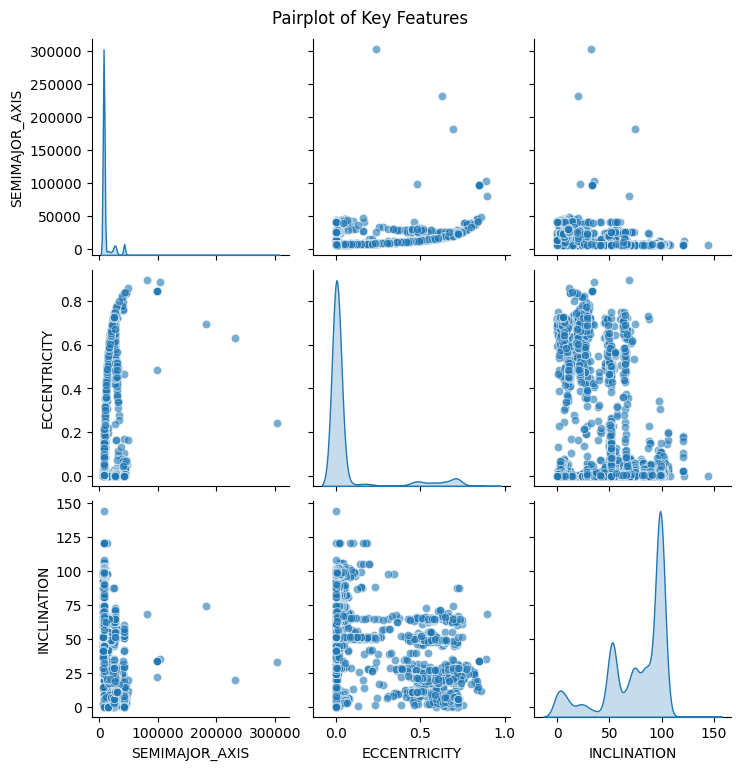

In [27]:
sns.pairplot(pairplot_df, diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [47]:
df = pd.read_csv('space_decay_preprocessed.csv')

# Identify feature columns (exclude one-hot object type columns)
object_type_cols = [col for col in df.columns if col.startswith('OBJECT_TYPE_')]
feature_cols = [col for col in df.columns if col not in object_type_cols + ['OBJECT_TYPE']]

In [48]:
# Reconstruct OBJECT_TYPE from one-hot encoded columns
df['OBJECT_TYPE'] = df[object_type_cols].idxmax(axis=1).str.replace('OBJECT_TYPE_', '')

# Prepare features and target for classification
X_b = df[feature_cols].dropna()
y_b = df.loc[X_b.index, 'OBJECT_TYPE']

In [49]:
# Define models and parameters
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}
params = {
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [5, 10]},
    'GradientBoosting': {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1]}
}

best_score = 0
best_model = None

for name, model in models.items():
    if name == 'LogisticRegression':
        model.fit(X_b, y_b)
        preds = model.predict(X_b)
        score = accuracy_score(y_b, preds)
    else:
        grid = GridSearchCV(model, params[name], cv=3, scoring='accuracy')
        grid.fit(X_b, y_b)
        score = grid.best_score_
        model = grid.best_estimator_
    print(f"{name} accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_model = model

# Save the best model
joblib.dump(best_model, 'best_model_object_type.pkl')
print(f"Best model for OBJECT_TYPE saved as best_model_object_type.pkl with accuracy: {best_score:.4f}")

ValueError: Found array with 0 sample(s) (shape=(0, 34)) while a minimum of 1 is required by LogisticRegression.